     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 740.8 kB/s eta 0:00:00
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [8, 0.0002982504537235301, 'auto', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [2, 0.0006478044017885774, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'auto', 'rbf'] before, using random point [3, 0.00028883154930368617, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for eac

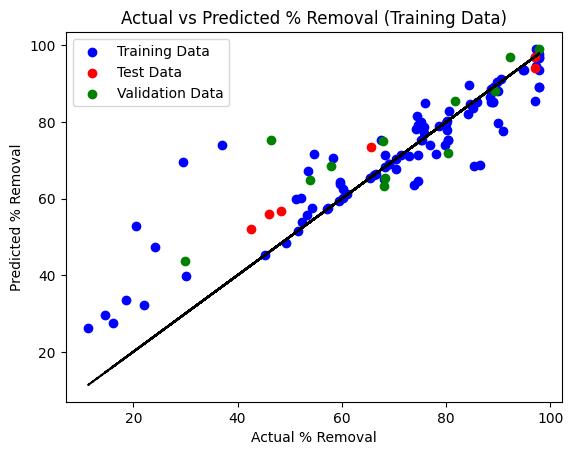

  0%|          | 0/99 [00:00<?, ?it/s]

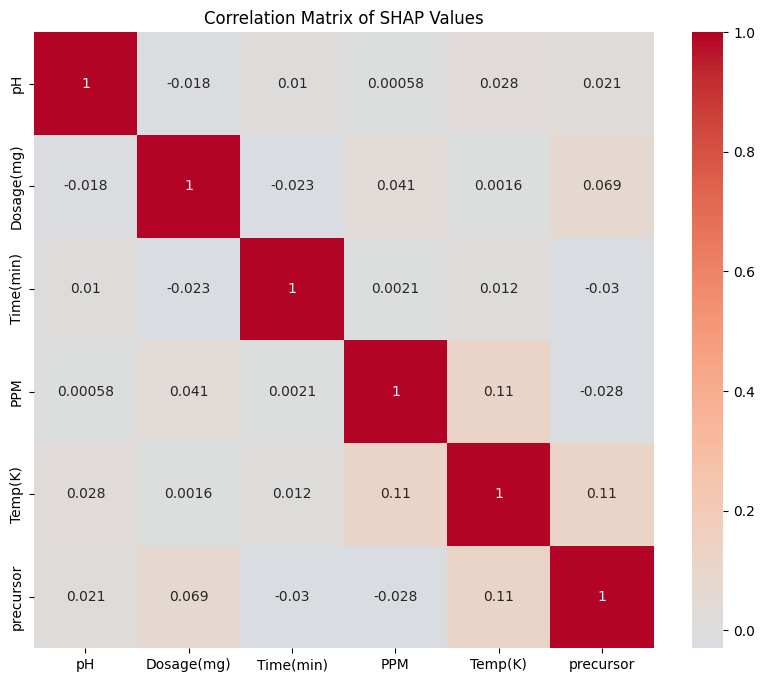

In [1]:
!pip install scikit-optimize
!pip install shap
!pip install xlsxwriter
!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from skopt import BayesSearchCV
from sklearn.utils import resample
import shap

# Load the data
df = pd.read_excel("/content/dataset_and_validation.xlsx")
X = df[['pH', 'Dosage(mg)', 'Time(min)', 'PPM', 'Temp(K)', 'precursor']]
y = df['% Removal']

# Split the data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.05, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=123)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Hyperparameter optimization
param_space = {
    'C': (1, 10),
    'gamma': ['scale', 'auto'],
    'epsilon': (0.0001, 0.001),
    'kernel': ['poly', 'rbf']
}
opt = BayesSearchCV(
    SVR(),
    param_space,
    n_iter=100,
    cv=13,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)
opt.fit(X_train_scaled, y_train)

print("Best parameters found: ", opt.best_params_)
print("Lowest RMSE found: ", np.sqrt(-opt.best_score_))

# Evaluate the best model
best_svr = opt.best_estimator_
y_pred = best_svr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Test RMSE: ", np.sqrt(mse))

# Performance metrics
train_pred = best_svr.predict(X_train_scaled)
test_pred = best_svr.predict(X_test_scaled)
val_pred = best_svr.predict(X_val_scaled)

train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
val_mae = mean_absolute_error(y_val, val_pred)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
val_r2 = r2_score(y_val, val_pred)

print("Train Mean Absolute Error:", train_mae)
print("Test Mean Absolute Error:", test_mae)
print("Val Mean Absolute Error:", val_mae)

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Val R-squared:", val_r2)

# Plot the training model
plt.scatter(y_train, train_pred, color='blue', label='Training Data')
plt.scatter(y_test, test_pred, color='red', label='Test Data')
plt.scatter(y_val, val_pred, color='green', label='Validation Data')
plt.plot(y_train, y_train, linestyle='--', color='black')
plt.xlabel('Actual % Removal')
plt.ylabel('Predicted % Removal')
plt.title('Actual vs Predicted % Removal (Training Data)')
plt.legend()
plt.show()



  0%|          | 0/99 [00:00<?, ?it/s]

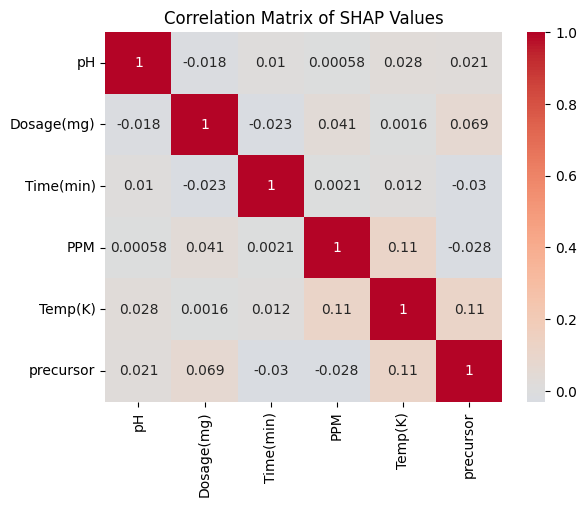

In [2]:

# Calculate SHAP values for the original model using KernelExplainer
explainer = shap.KernelExplainer(best_svr.predict, X_train_scaled)
shap_values = explainer.shap_values(X_train_scaled)

# Create a DataFrame with SHAP values
shap_df = pd.DataFrame(shap_values, columns=X.columns)

# Calculate the correlation matrix for SHAP values
shap_corr = shap_df.corr()

sns.heatmap(shap_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of SHAP Values')
plt.show()

Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'auto', 'rbf'] before, using random point [8, 0.000957843253691571, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [5, 0.000933920828228951, 'auto', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [4, 0.00019122417312187487, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [4, 0.0009893739357115026, 'auto', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [7, 0.0005636711288441185, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [9, 0.0002827375568208637, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [5, 0.00020393915559802588, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [2, 0.00024318167559373566, 'scale', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [8, 0.000435032573022244, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [4, 0.00026794819675172646, 'scale', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [4, 0.0005389720083760131, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [8, 0.0003319200605579185, 'auto', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [6, 0.0007282986458022753, 'auto', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [4, 0.0006144483613064897, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [3, 0.00047425078622336604, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [3, 0.0007597258967974644, 'scale', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [6, 0.0007342314566754825, 'scale', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [9, 0.0009158234024274895, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [7, 0.00032959050311692794, 'scale', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [10, 0.000940444038249504, 'auto', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [10, 0.00027396363998884366, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [7, 0.0005507819037541374, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [2, 0.0004955452590351701, 'scale', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [6, 0.0008931199780364223, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [4, 0.0008598701585375025, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [3, 0.0005246734819525465, 'scale', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [6, 0.000866728050265104, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [3, 0.00010343038557626362, 'scale', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [2, 0.00010405084269982588, 'auto', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [5, 0.0006601308277739891, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [2, 0.0007649671675327663, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [5, 0.0003800921732117613, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [6, 0.0001930726017386858, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [4, 0.0002670833383798733, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [4, 0.00042543790315211036, 'scale', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [4, 0.0005313516301564622, 'scale', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [6, 0.0006533704895118774, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [10, 0.0008199339398413429, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [4, 0.00012852911685833456, 'auto', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'auto', 'rbf'] before, using random point [3, 0.0003574364489030827, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [3, 0.0003665680325568548, 'scale', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [3, 0.0003995108252628728, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'auto', 'rbf'] before, using random point [7, 0.0008053050453447932, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [7, 0.0007547270940328834, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'auto', 'rbf'] before, using random point [9, 0.0004067412138804386, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [4, 0.0002625579867807996, 'auto', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [9, 0.0009969238652324226, 'scale', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'auto', 'rbf'] before, using random point [2, 0.0007041099950300235, 'scale', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'auto', 'rbf'] before, using random point [9, 0.0006602236814323514, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'auto', 'rbf'] before, using random point [3, 0.0003277193856614643, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'auto', 'rbf'] before, using random point [6, 0.0007973645738219148, 'auto', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [7, 0.0008485634025227043, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [2, 0.0007776565131697528, 'scale', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [6, 0.0006135356707058898, 'auto', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [10, 0.00044766656910886306, 'auto', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [8, 0.0002839831152963583, 'scale', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'auto', 'rbf'] before, using random point [2, 0.0009413700922287434, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [4, 0.0007023219335270831, 'auto', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [6, 0.0004221428523576601, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [2, 0.0005813719479324936, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [5, 0.0004158982420535487, 'scale', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [9, 0.0003360883007136379, 'auto', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [7, 0.00011180837574390462, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'auto', 'rbf'] before, using random point [1, 0.0005848907946146074, 'scale', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [5, 0.0008166912744242343, 'scale', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [8, 0.0009218902642391315, 'auto', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [5, 0.0009096647329474416, 'scale', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [8, 0.0009399331614075434, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [3, 0.0004937867086626835, 'auto', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [4, 0.00011403298155711939, 'auto', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [10, 0.0008361948814825672, 'scale', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [6, 0.0008675432141937087, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'auto', 'rbf'] before, using random point [7, 0.00034331535657562196, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [4, 0.00021330738280348334, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [5, 0.0007881326969417208, 'scale', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'auto', 'rbf'] before, using random point [9, 0.00013547752013958522, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'auto', 'rbf'] before, using random point [3, 0.0007914456346047269, 'auto', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [6, 0.0007959410170300166, 'auto', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'auto', 'rbf'] before, using random point [6, 0.000882451263904998, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'auto', 'rbf'] before, using random point [7, 0.00038335228939607183, 'auto', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'auto', 'rbf'] before, using random point [3, 0.00035982614515770063, 'scale', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [6, 0.0005731253231422222, 'auto', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [9, 0.0007855553678353378, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [2, 0.00018943800940453336, 'scale', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'scale', 'rbf'] before, using random point [6, 0.0008590899373348015, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'auto', 'rbf'] before, using random point [6, 0.000598676878896236, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits
Best parameters found:  OrderedDict([('C', 10), ('epsilon', 0.0001), ('gamma', 'auto'), ('kernel', 'rbf')])
Lowest RMSE found:  1.1546073210694157
Test RMSE:  1.1473734249741583
Train Mean Absolute Error: 0.3833556824582793
Test Mean Absolute Error: 0.6582716900351717
Val Mean Absolute Error: 0.7035389472640619
Train R-squared: 0.980843912305016
Test R-squared: 0.9790916058945166
Val R-squared: 0.9684338661770019


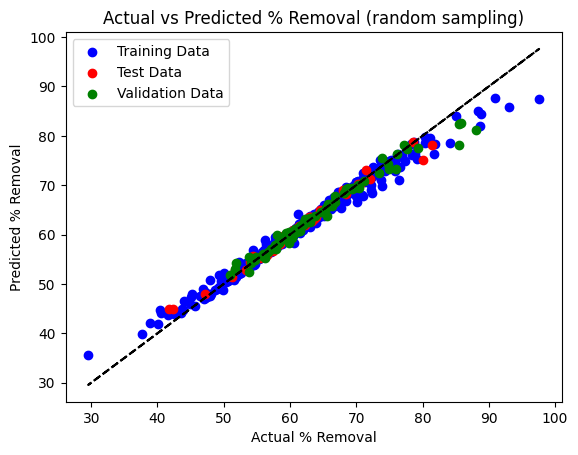

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from skopt import BayesSearchCV
from sklearn.utils import resample
import shap

# Load the data
df = pd.read_excel("/content/random_samples_with_predictions (1).xlsx")
X = df[['pH', 'Dosage(mg)', 'Time(min)', 'PPM', 'Temp(K)', 'precursor']]
y = df['% Removal']

# Split the data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.05, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=123)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Hyperparameter optimization
param_space = {
    'C': (1, 10),
    'gamma': ['scale', 'auto'],
    'epsilon': (0.0001, 0.001),
    'kernel': ['poly', 'rbf']
}
opt = BayesSearchCV(
    SVR(),
    param_space,
    n_iter=100,
    cv=13,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)
opt.fit(X_train_scaled, y_train)

print("Best parameters found: ", opt.best_params_)
print("Lowest RMSE found: ", np.sqrt(-opt.best_score_))

# Evaluate the best model
best_svr = opt.best_estimator_
y_pred = best_svr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Test RMSE: ", np.sqrt(mse))

# Performance metrics
train_pred = best_svr.predict(X_train_scaled)
test_pred = best_svr.predict(X_test_scaled)
val_pred = best_svr.predict(X_val_scaled)

train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
val_mae = mean_absolute_error(y_val, val_pred)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
val_r2 = r2_score(y_val, val_pred)

print("Train Mean Absolute Error:", train_mae)
print("Test Mean Absolute Error:", test_mae)
print("Val Mean Absolute Error:", val_mae)

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Val R-squared:", val_r2)

# Plot the training model
plt.scatter(y_train, train_pred, color='blue', label='Training Data')
plt.scatter(y_test, test_pred, color='red', label='Test Data')
plt.scatter(y_val, val_pred, color='green', label='Validation Data')
plt.plot(y_train, y_train, linestyle='--', color='black')
plt.xlabel('Actual % Removal')
plt.ylabel('Predicted % Removal')
plt.title('Actual vs Predicted % Removal (random sampling)')
plt.legend()
plt.show()

Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for eac

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [8, 0.0002982504537235301, 'auto', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [2, 0.0006478044017885774, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'auto', 'rbf'] before, using random point [3, 0.00028883154930368617, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for eac

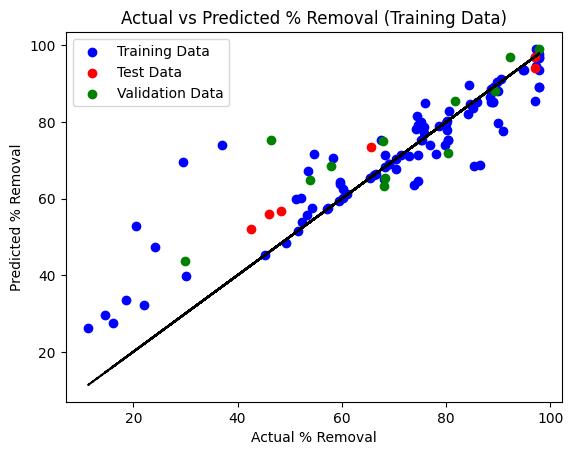

  0%|          | 0/99 [00:00<?, ?it/s]

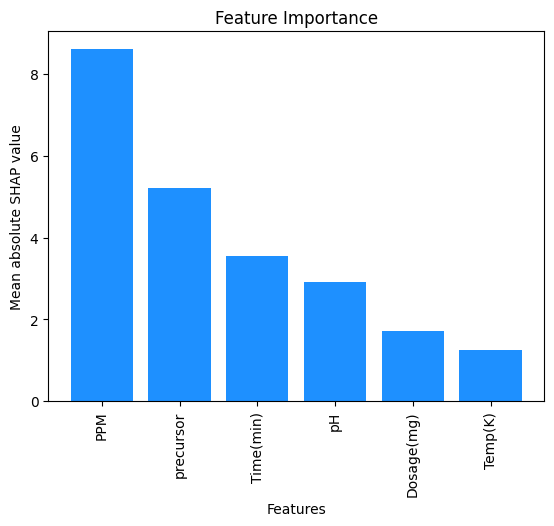

In [5]:
!pip install scikit-optimize shap xlsxwriter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from skopt import BayesSearchCV
from sklearn.utils import resample
import shap

# Load the data
df = pd.read_excel("/content/dataset_and_validation.xlsx")
X = df[['pH', 'Dosage(mg)', 'Time(min)', 'PPM', 'Temp(K)', 'precursor']]
y = df['% Removal']

# Split the data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.05, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=123)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Hyperparameter optimization
param_space = {
    'C': (1, 10),
    'gamma': ['scale', 'auto'],
    'epsilon': (0.0001, 0.001),
    'kernel': ['poly', 'rbf']
}
opt = BayesSearchCV(
    SVR(),
    param_space,
    n_iter=100,
    cv=13,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)
opt.fit(X_train_scaled, y_train)

print("Best parameters found: ", opt.best_params_)
print("Lowest RMSE found: ", np.sqrt(-opt.best_score_))

# Evaluate the best model
best_svr = opt.best_estimator_
y_pred = best_svr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Test RMSE: ", np.sqrt(mse))

# Performance metrics
train_pred = best_svr.predict(X_train_scaled)
test_pred = best_svr.predict(X_test_scaled)
val_pred = best_svr.predict(X_val_scaled)

train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
val_mae = mean_absolute_error(y_val, val_pred)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
val_r2 = r2_score(y_val, val_pred)

print("Train Mean Absolute Error:", train_mae)
print("Test Mean Absolute Error:", test_mae)
print("Val Mean Absolute Error:", val_mae)

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Val R-squared:", val_r2)

# Plot the training model
plt.scatter(y_train, train_pred, color='blue', label='Training Data')
plt.scatter(y_test, test_pred, color='red', label='Test Data')
plt.scatter(y_val, val_pred, color='green', label='Validation Data')
plt.plot(y_train, y_train, linestyle='--', color='black')
plt.xlabel('Actual % Removal')
plt.ylabel('Predicted % Removal')
plt.title('Actual vs Predicted % Removal (Training Data)')
plt.legend()
plt.show()

# Calculate SHAP values for the original model using KernelExplainer
explainer_original = shap.KernelExplainer(best_svr.predict, X_train_scaled)
shap_values_original = explainer_original.shap_values(X_train_scaled)

# Calculate mean absolute SHAP values
shap_values_mean_abs = np.mean(np.abs(shap_values_original), axis=0)

# Create bar plot for mean absolute SHAP values
features = X.columns
mean_abs_shap_values = pd.Series(shap_values_mean_abs, index=features).sort_values(ascending=False)

plt.bar(mean_abs_shap_values.index, mean_abs_shap_values, color='dodgerblue')
plt.xlabel('Features')
plt.ylabel('Mean absolute SHAP value')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()


Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for eac

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [8, 0.0002982504537235301, 'auto', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.001, 'auto', 'rbf'] before, using random point [2, 0.0006478044017885774, 'scale', 'poly']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.0001, 'auto', 'rbf'] before, using random point [3, 0.00028883154930368617, 'auto', 'rbf']
  warnings.warn(


Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for each of 1 candidates, totalling 13 fits
Fitting 13 folds for eac

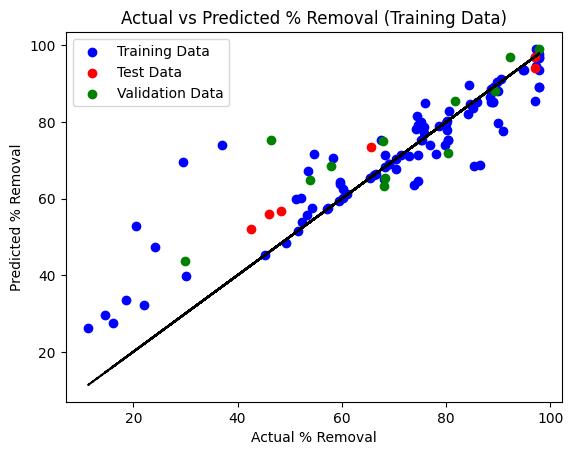

  0%|          | 0/99 [00:00<?, ?it/s]

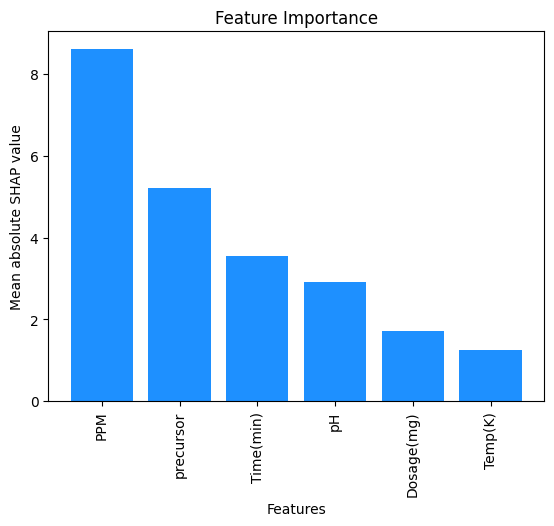

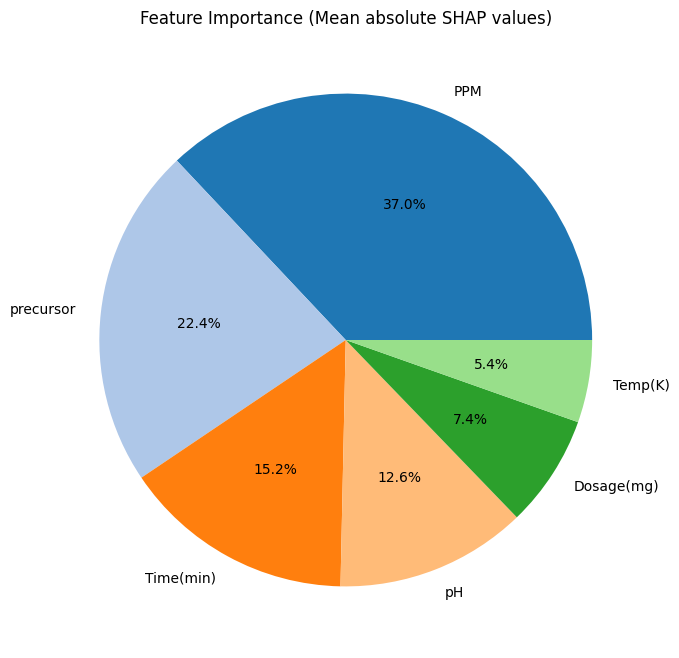

In [2]:
!pip install scikit-optimize shap xlsxwriter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from skopt import BayesSearchCV
from sklearn.utils import resample
import shap

# Load the data
df = pd.read_excel("/content/dataset_and_validation.xlsx")
X = df[['pH', 'Dosage(mg)', 'Time(min)', 'PPM', 'Temp(K)', 'precursor']]
y = df['% Removal']

# Split the data
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.05, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1, random_state=123)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Hyperparameter optimization
param_space = {
    'C': (1, 10),
    'gamma': ['scale', 'auto'],
    'epsilon': (0.0001, 0.001),
    'kernel': ['poly', 'rbf']
}
opt = BayesSearchCV(
    SVR(),
    param_space,
    n_iter=100,
    cv=13,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)
opt.fit(X_train_scaled, y_train)

print("Best parameters found: ", opt.best_params_)
print("Lowest RMSE found: ", np.sqrt(-opt.best_score_))

# Evaluate the best model
best_svr = opt.best_estimator_
y_pred = best_svr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Test RMSE: ", np.sqrt(mse))

# Performance metrics
train_pred = best_svr.predict(X_train_scaled)
test_pred = best_svr.predict(X_test_scaled)
val_pred = best_svr.predict(X_val_scaled)

train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
val_mae = mean_absolute_error(y_val, val_pred)

train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
val_r2 = r2_score(y_val, val_pred)

print("Train Mean Absolute Error:", train_mae)
print("Test Mean Absolute Error:", test_mae)
print("Val Mean Absolute Error:", val_mae)

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)
print("Val R-squared:", val_r2)

# Plot the training model
plt.scatter(y_train, train_pred, color='blue', label='Training Data')
plt.scatter(y_test, test_pred, color='red', label='Test Data')
plt.scatter(y_val, val_pred, color='green', label='Validation Data')
plt.plot(y_train, y_train, linestyle='--', color='black')
plt.xlabel('Actual % Removal')
plt.ylabel('Predicted % Removal')
plt.title('Actual vs Predicted % Removal (Training Data)')
plt.legend()
plt.show()

# Calculate SHAP values for the original model using KernelExplainer
explainer_original = shap.KernelExplainer(best_svr.predict, X_train_scaled)
shap_values_original = explainer_original.shap_values(X_train_scaled)

# Calculate mean absolute SHAP values
shap_values_mean_abs = np.mean(np.abs(shap_values_original), axis=0)

# Create bar plot for mean absolute SHAP values
features = X.columns
mean_abs_shap_values = pd.Series(shap_values_mean_abs, index=features).sort_values(ascending=False)

plt.bar(mean_abs_shap_values.index, mean_abs_shap_values, color='dodgerblue')
plt.xlabel('Features')
plt.ylabel('Mean absolute SHAP value')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

# Create pie chart for mean absolute SHAP values
plt.figure(figsize=(8, 8))
plt.pie(mean_abs_shap_values, labels=mean_abs_shap_values.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Feature Importance (Mean absolute SHAP values)')
plt.show()
